# Data Mining Final Project: Car Prices Prediction

## 1. Introduction and Data Inspection

With the prices of computer chips increasing every year, car prices is a hot topic. For this final project, our group decided to predict the prices of cars, which might be helpful for anyone who’s looking to purchase cars or making an investment in cars in the future. The goal of this project is to use regression analysis to predict the car prices based on multiple features of the car. The questions we are trying to answer are:


1.   What features have the most impact on car prices?
2.   What are the pricing dynamics of the current car market?





In [ ]:
#importing the needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, scale
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression
le = LabelEncoder()



In [ ]:
# Imports
import os
from google.colab import drive

# Access Google Drive
drive.mount('/content/drive', force_remount=True)
dir = '/content/drive/My Drive/Data Mining Final Project/'

# Load Dataset
car = pd.read_csv(os.path.join(dir, 'CarPrice_Assignment.csv'))

Mounted at /content/drive


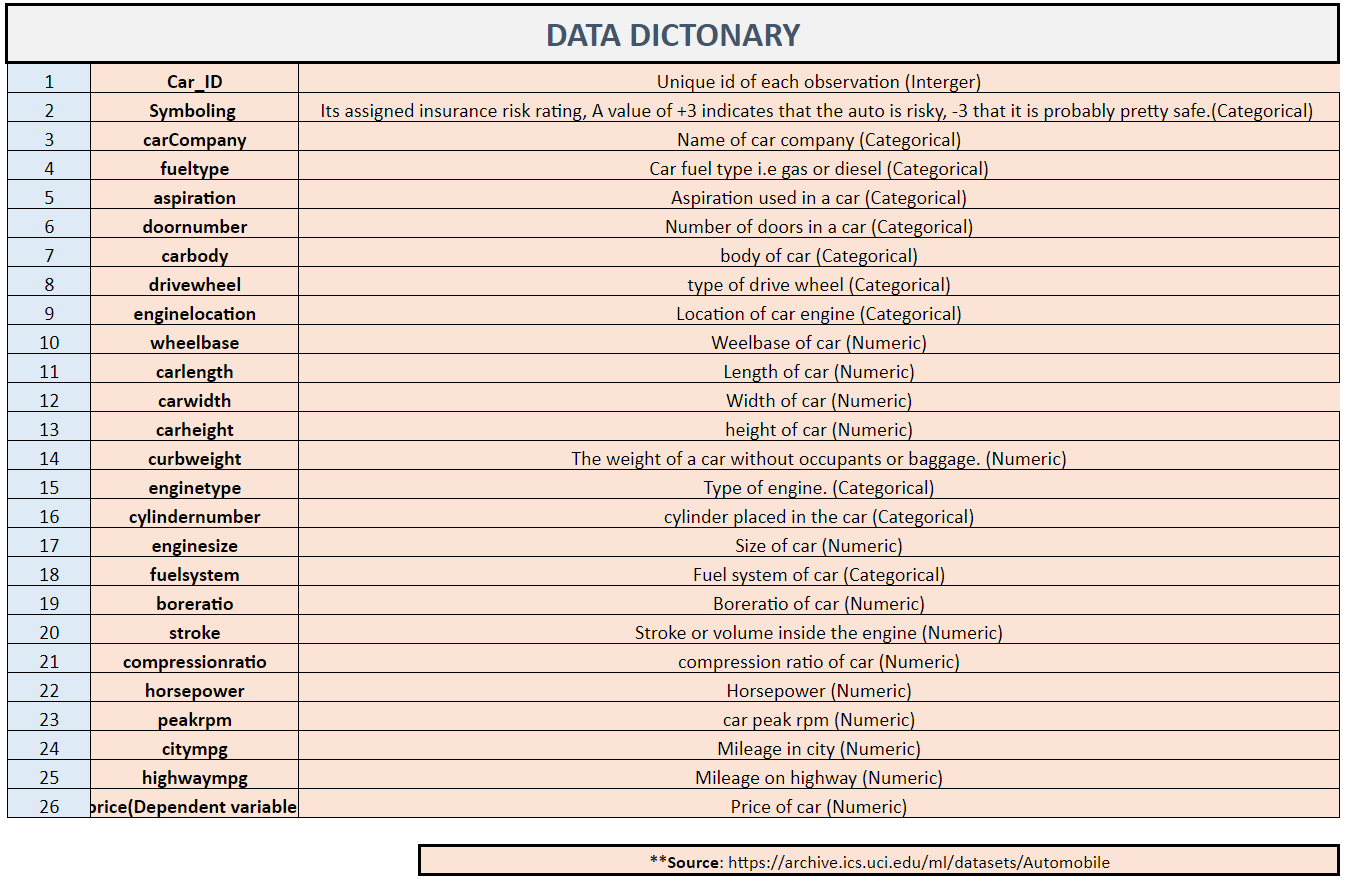

In [ ]:
car_copy = car
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
car.shape

(205, 26)

In [ ]:
#checking the amount and name of columns
car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
#checking the tyoe for each feature
car.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
# calculate statistics of numerical values
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## 2. Data Visualization and Preprocessing



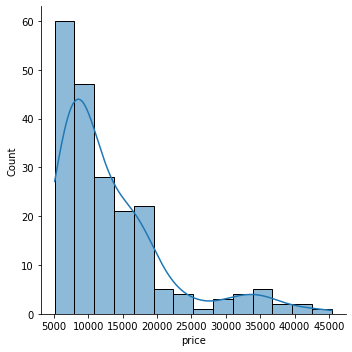

In [ ]:
# visualizing the prices
sns.displot(car['price'], kde=True)

In [ ]:
# get numerical columns only
num_cols=car.select_dtypes(exclude=['object']).columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f78b07099d0>,
      dtype=object)

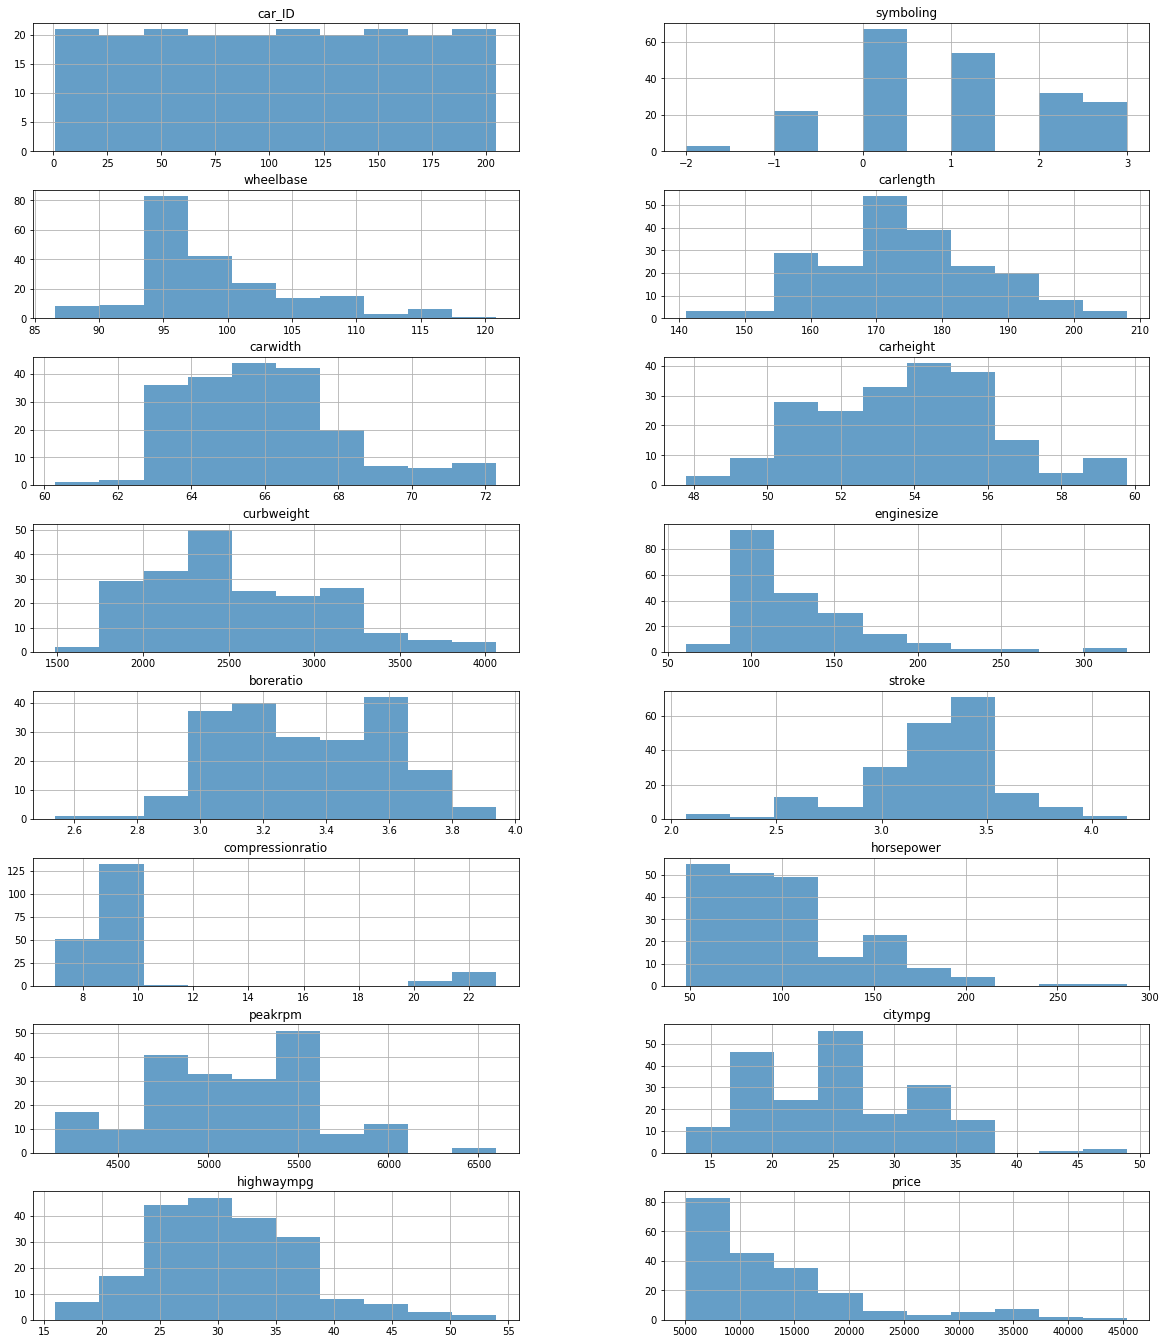

In [ ]:
# histograms of all the numerical features
car[num_cols].hist(layout=(10,2),figsize=(20, 30),color='#659ec7')

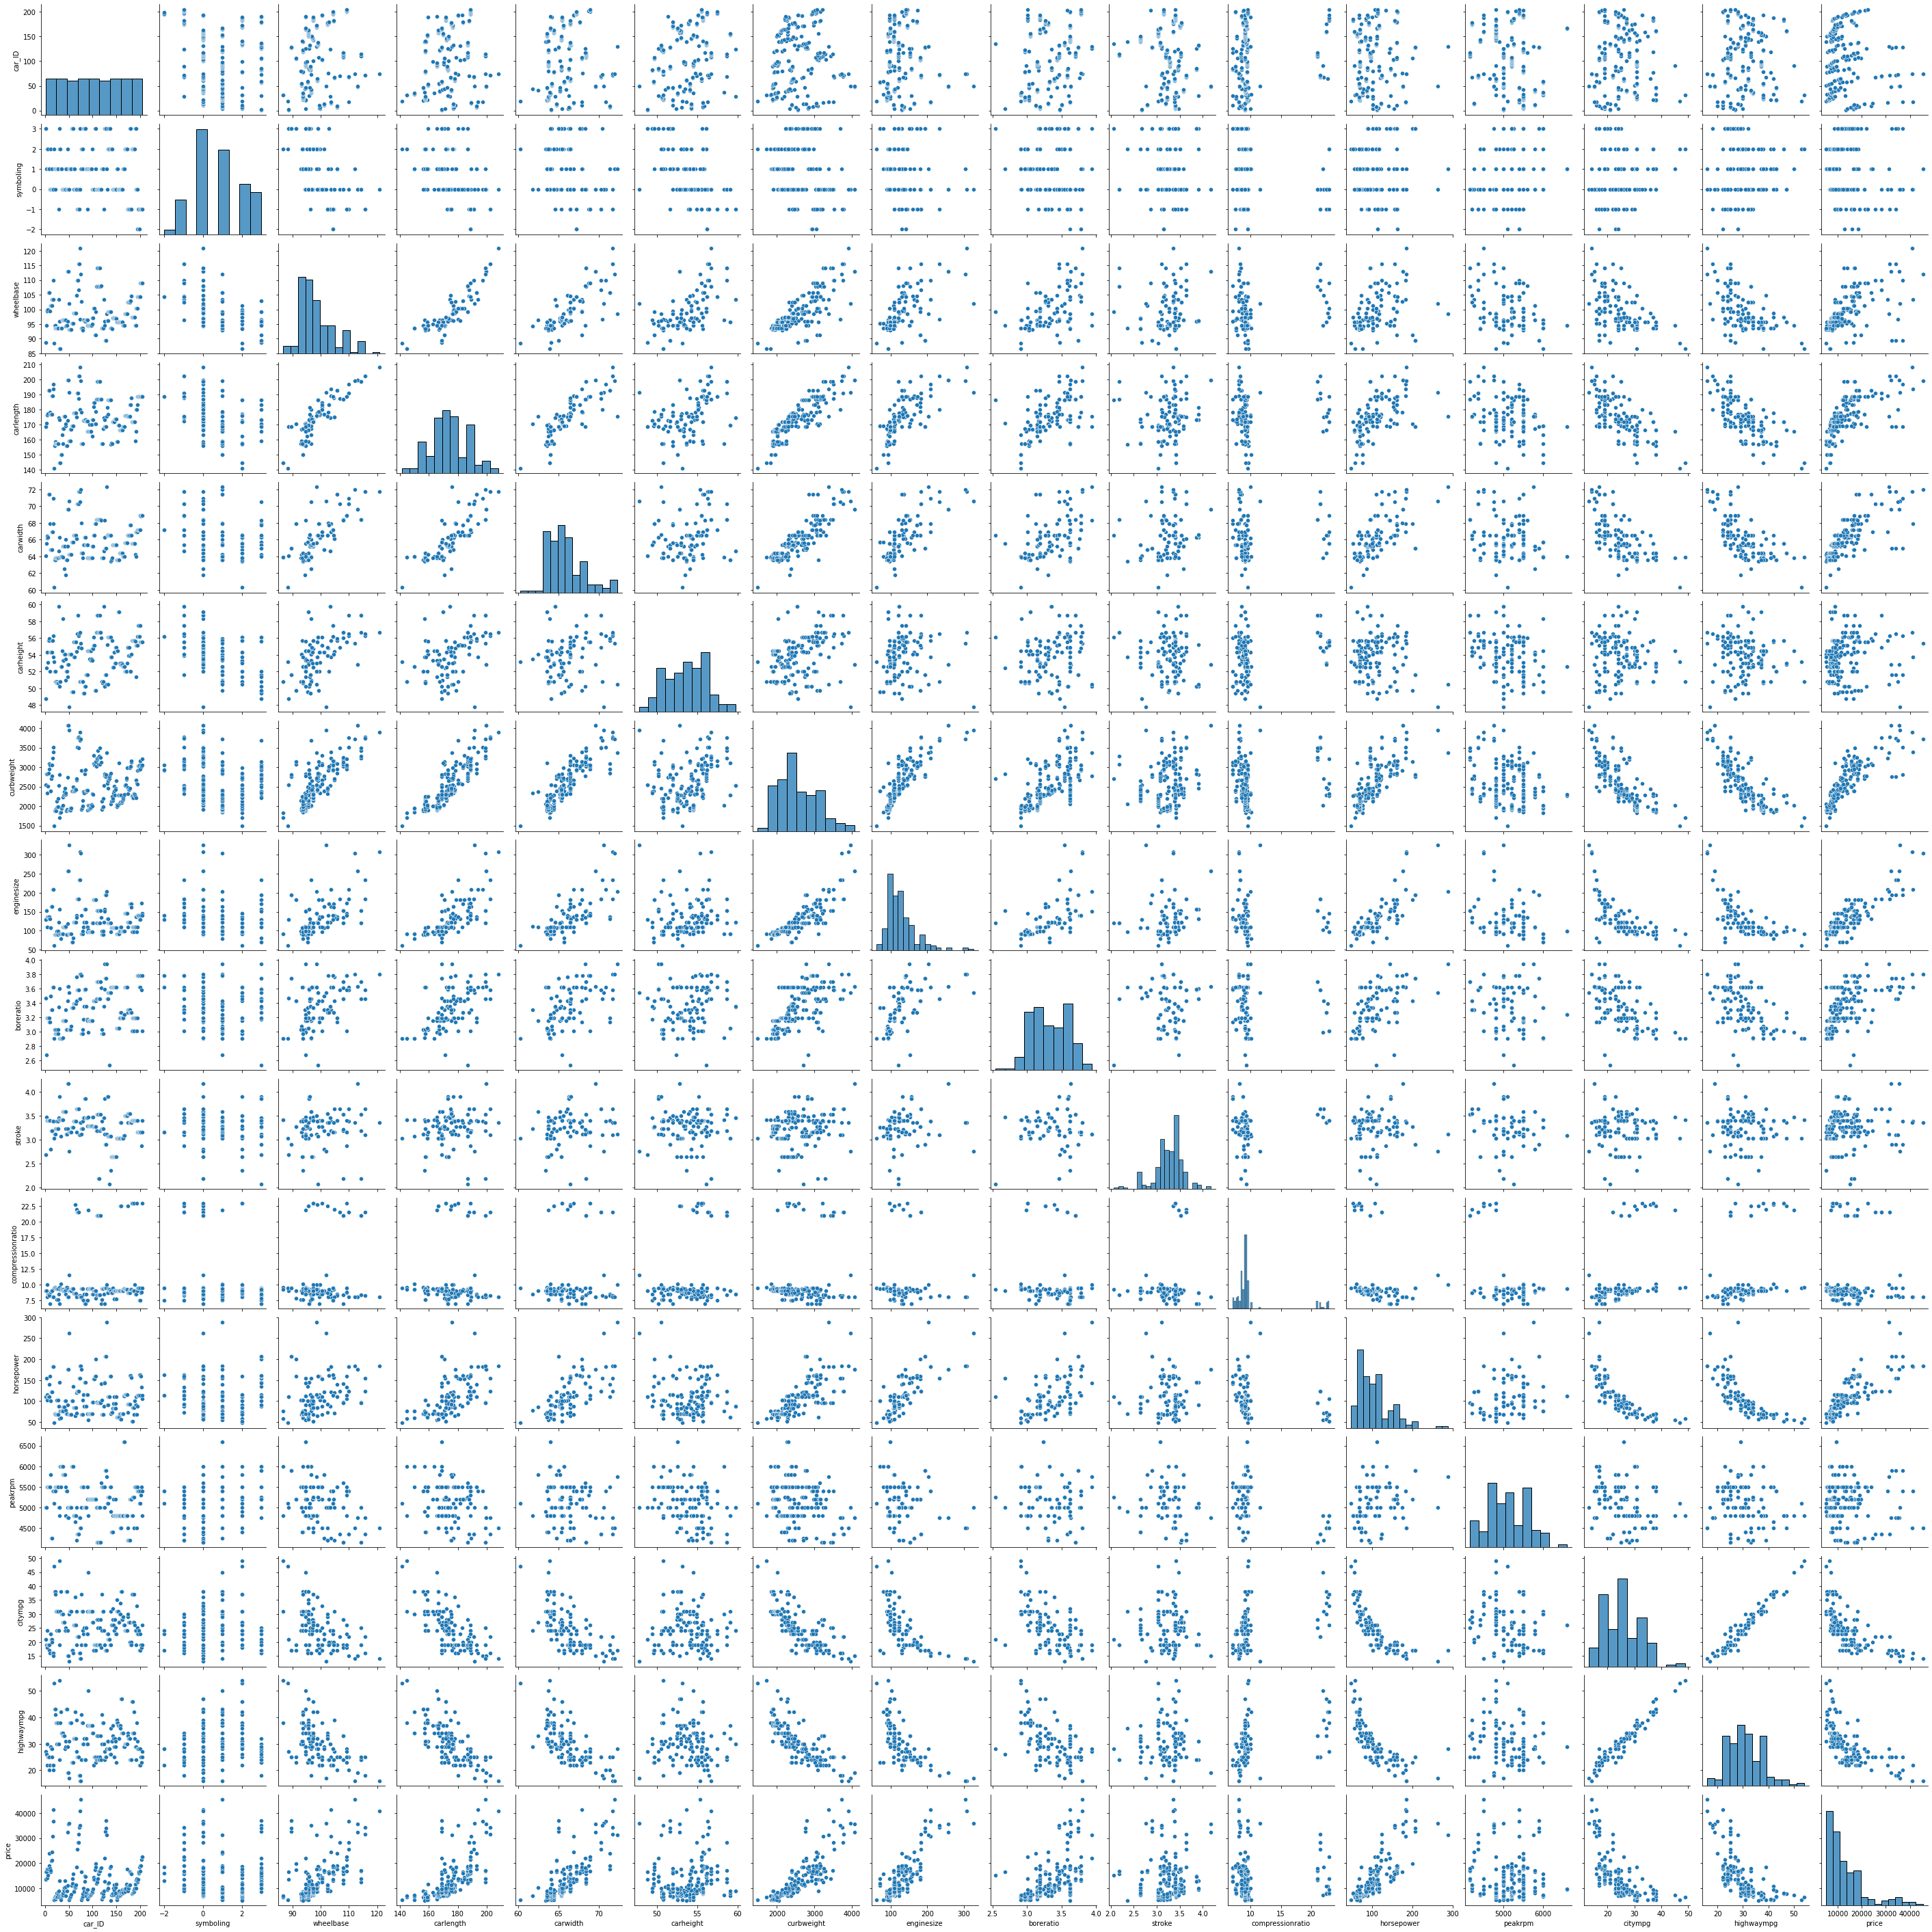

In [ ]:
# pairplot of all the numerical features
sns.pairplot(car[num_cols])

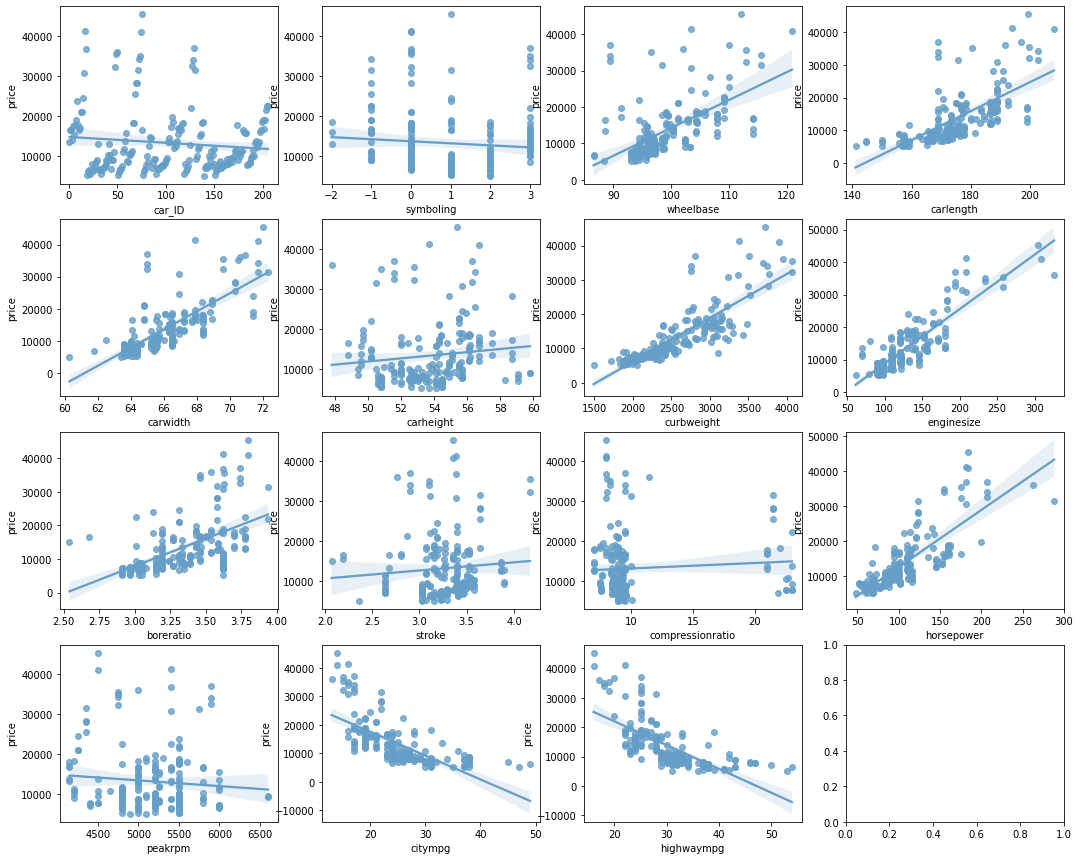

In [ ]:
# numerical features fitting prices
fig,axes = plt.subplots(4,4,figsize=(18,15))
for seg,col in enumerate(num_cols[:len(num_cols)-1]):
    
    x,y = seg//4,seg%4
    sns.regplot(x=col, y='price' ,data=car,ax=axes[x][y],color='#659ec7')

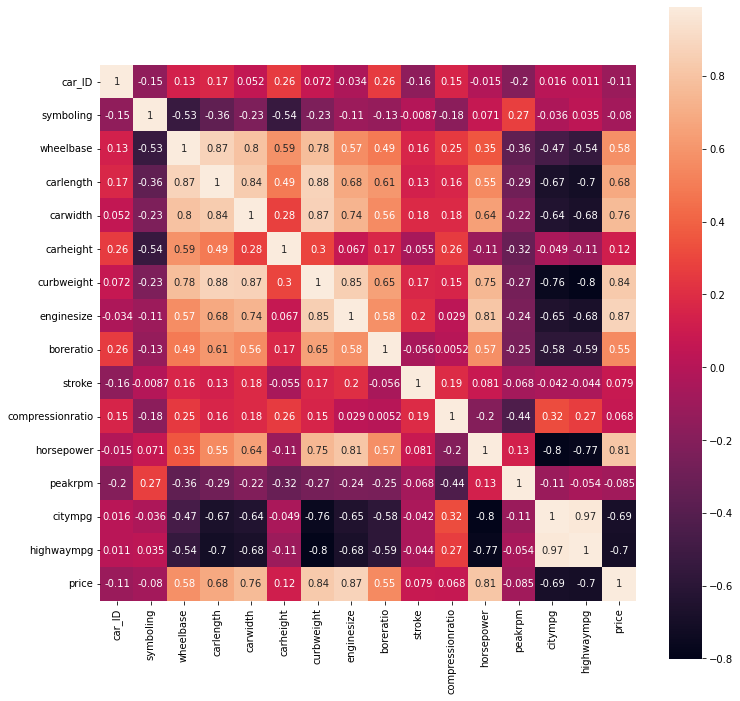

In [ ]:
# correlation heatmap between all the features
plt.subplots(figsize=(12,12))
sns.heatmap(car.corr(), vmax=0.99, square=True, annot=True)

In [ ]:
# check for nulls and remove them
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
# drop unncessary columns
car = car.drop(['CarName', 'car_ID'], axis = 1)

In [ ]:
# Label Encode categorical columns
col_list = list(car.columns)

for i in col_list:
    if car[i].dtype == 'object':
        car[i]=le.fit_transform(car[i])

In [ ]:
car

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,0,1,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,1,2,2,0,94.5,171.2,65.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,0,0,3,1,0,99.8,176.6,66.2,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,0,0,3,0,0,99.4,176.6,66.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,0,3,2,0,109.1,188.8,68.9,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,1,1,0,3,2,0,109.1,188.8,68.8,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,1,0,0,3,2,0,109.1,188.8,68.9,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,0,1,0,3,2,0,109.1,188.8,68.9,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
# split into X and y
y = car['price']
X = car.drop('price', axis=1)


## 3. Modeling and Experimenting

## Test 1

In [ ]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size= 0.8,
                                                    test_size = 0.2, random_state=100)

In [ ]:
# use basic Linear Regression
linearmodel = LinearRegression()
linearmodel.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = linearmodel.predict(X_test)
#Evaluation of the test
mse_1 = mean_squared_error(y_test, y_pred)
mae_1 = mean_absolute_error(y_test, y_pred)
r2_1 = r2_score(y_test, y_pred)
rmse_1 = np.sqrt(mse_1)

# The mean squared error
print('Mean squared error: %.2f'
      % mse_1)

# The mean squared error
print('Mean absolute error: %.2f'
      % mae_1)

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_1)

# The root mean squared error
print('Root mean squared error: %.2f'
      % rmse_1)

Mean squared error: 9814974.21
Mean absolute error: 2370.67
Coefficient of determination: 0.87
Root mean squared error: 3132.89


## Test 2

In [ ]:
# log transform the prices column to normalize it
y = np.log(y+1)

In [ ]:
# scale the independent variables
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [ ]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    train_size= 0.8,
                                                    test_size = 0.2, random_state=100)

In [ ]:
# pick columns with high correlation to the target variable using f_regression
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k=10)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [ ]:
# call select_features
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)


In [ ]:
# get the scores for each feature
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
 

Feature 0: 1.034049
Feature 1: 3.685914
Feature 2: 12.285759
Feature 3: 1.585819
Feature 4: 0.013800
Feature 5: 89.888396
Feature 6: 11.685024
Feature 7: 105.828235
Feature 8: 233.305167
Feature 9: 300.629107
Feature 10: 1.769554
Feature 11: 634.507943
Feature 12: 0.470917
Feature 13: 1.102147
Feature 14: 372.470259
Feature 15: 120.709365
Feature 16: 88.534961
Feature 17: 3.297734
Feature 18: 1.953089
Feature 19: 334.350439
Feature 20: 1.112605
Feature 21: 211.938932
Feature 22: 214.415477


In [ ]:
# apply Linear Regression model
linearmodel2 = LinearRegression()
linearmodel2.fit(X_train_fs, y_train)

LinearRegression()

In [ ]:
y_pred2 = linearmodel2.predict(X_test_fs)
#Evaluation of the test
mse_2 = mean_squared_error(y_test, y_pred2)
mae_2 = mean_absolute_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)
rmse_2 = np.sqrt(mse_2)

# The mean squared error
print('Mean squared error: %.2f'
      % mse_2)

# The mean squared error
print('Mean absolute error: %.2f'
      % mae_2)

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_2)

# The root mean squared error
print('Root mean squared error: %.2f'
      % rmse_2)

Mean squared error: 0.04
Mean absolute error: 0.16
Coefficient of determination: 0.84
Root mean squared error: 0.20


## Test 3

In [ ]:
# apply Ridge Regression model
ridgemodel = Ridge()
ridgemodel.fit(X_train_fs, y_train)
ridge_y_pred = ridgemodel.predict(X_test_fs)

In [ ]:
#Evaluation of the test
mse_3 = mean_squared_error(y_test, ridge_y_pred)
mae_3 = mean_absolute_error(y_test, ridge_y_pred)
r2_3 = r2_score(y_test, ridge_y_pred)
rmse_3 = np.sqrt(mse_3)

# The mean squared error
print('Mean squared error: %.2f'
      % mse_3)

# The mean squared error
print('Mean absolute error: %.2f'
      % mae_3)

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_3)

# The root mean squared error
print('Root mean squared error: %.2f'
      % rmse_3)

Mean squared error: 0.04
Mean absolute error: 0.16
Coefficient of determination: 0.84
Root mean squared error: 0.20


## Test 4

In [ ]:
#define the evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the pipeline to evaluate
model = LinearRegression()
fs = SelectKBest(score_func=mutual_info_regression)
pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
# define the grid
grid = dict()
grid['sel__k'] = [i for i in range(X.shape[1]-15, X.shape[1])]
# define the grid search
search = GridSearchCV(pipeline, grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(X, y)
# summarize best
print('Best MAE: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

Best MAE: -0.035
Best Config: {'sel__k': 22}


In [ ]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    train_size= 0.8,
                                                    test_size = 0.2, random_state=100)

In [ ]:
# apply Linear Regression model
linearmodel2.fit(X_train, y_train)
y_pred4 = linearmodel2.predict(X_test)

In [ ]:
#Evaluation of the test
mse_4 = mean_squared_error(y_test, y_pred4)
mae_4 = mean_absolute_error(y_test, y_pred4)
r2_4 = r2_score(y_test, y_pred4)
rmse_4 = np.sqrt(mse_4)

# The mean squared error
print('Mean squared error: %.2f'
      % mse_4)

# The mean squared error
print('Mean absolute error: %.2f'
      % mae_4)

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_4)

# The root mean squared error
print('Root mean squared error: %.2f'
      % rmse_4)

Mean squared error: 0.03
Mean absolute error: 0.13
Coefficient of determination: 0.89
Root mean squared error: 0.16


## 4. Evaluation

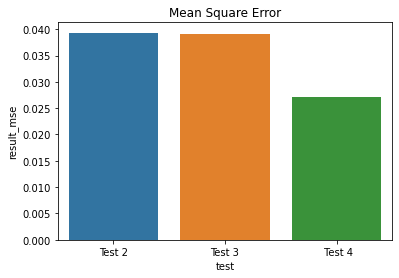

In [ ]:
# concat all results of metrics
mse = np.array([mse_1, mse_2, mse_3, mse_4])
mae = np.array([mae_1, mae_2, mae_3, mae_4])
r2 = np.array([r2_1, r2_2, r2_3, r2_4])
rmse = np.array([rmse_1, rmse_2, rmse_3, rmse_4])

mse2 = np.array([mse_2, mse_3, mse_4])
mae2 = np.array([mae_2, mae_3, mae_4])
r22 = np.array([r2_2, r2_3, r2_4])
rmse2 = np.array([rmse_2, rmse_3, rmse_4])

d = {
     'test': ['Test 1', 'Test 2', 'Test 3', ' Test 4'], 
     'result_mse': mse,
     'result_mae': mae,
     'result_r2': r2,
     'result_rmse': rmse
     }
d2 = {
     'test': ['Test 2', 'Test 3', ' Test 4'], 
     'result_mse': mse2,
     'result_mae': mae2,
     'result_r2': r22,
     'result_rmse': rmse2
     } 
results = pd.DataFrame(d)
results2 = pd.DataFrame(d2)

# bar graph for mse
mse_bar = sns.barplot(x="test", y="result_mse", data=results2).set(title='Mean Square Error')

In [ ]:
results

,test,result_mse,result_mae,result_r2,result_rmse
0,Test 1,9.814974e+06,2370.667009,0.872597,3132.885924
1,Test 2,3.932836e-02,0.160884,0.839319,0.198314
2,Test 3,3.917054e-02,0.160606,0.839964,0.197915
3,Test 4,2.720503e-02,0.130083,0.888851,0.164939


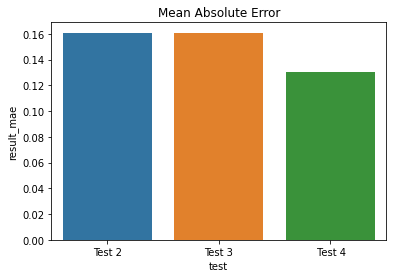

In [ ]:
# bar graph for mae
mae_bar = sns.barplot(x="test", y="result_mae", data=results2).set(title='Mean Absolute Error')

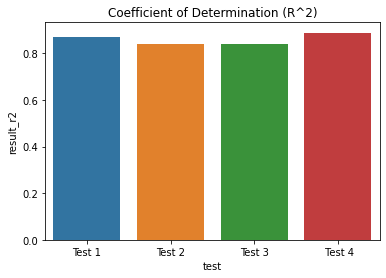

In [ ]:
# bar graph for r2_score
r2_bar = sns.barplot(x="test", y="result_r2", data=results).set(title='Coefficient of Determination (R^2)')

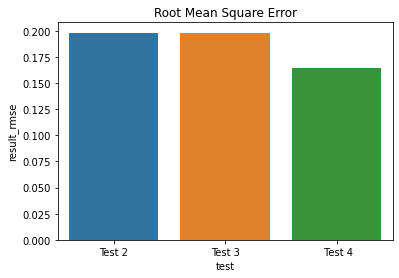

In [ ]:
# bar graph for rmse
rmse_bar = sns.barplot(x="test", y="result_rmse", data=results2).set(title='Root Mean Square Error')

## 5. Storytelling/Conclusion

The features that affect the prices the most are 'CarName', 'fueltype', 'carbody', 'drivewheel', 'enginetype', 'enginelocation', 'enginesize', 'horsepower', 'peakrpm', 'citympg',  'highwaympg’. The original data on Kaggle was posted 3 years ago so the pricing of the cars are quite outdated. From the graphs, we learned that most car prices are in the range of $5000 - $10000 at the time. Our project consisted of four different experiments or tests and each experiment has its own story to tell. Whether it was a linear regression or a ridge regression, our different experiments show us how well they perform when different features or pre-processing steps were taken each time. For example, experiment number four tells that out of all of our experiments, this one works the best with a coefficient of determination of 0.89, the highest when being compared with the other ones from different experiments. In the future, we plan to scrape the latest car prices and use some other regression models to have a better understanding of the current market.

## 6. Project Impact

Just in the last year, there were about 66.7 million cars that were sold and bought by customers. For more than half that number, buying a car might be a luxury that can only happen once in their lifetime. The amount of research and time that goes into figuring out which car is the most useful for a specific person is important. Our project can help in figuring out what features impact the increase in cars’ prices. As a whole, our project is one which leaves a social impact. Our project can help one who wants a lifetime car or one who wants to purchase a car with the most extravagant features. 